<a href="https://colab.research.google.com/github/Weikang01/Do_something_with_tensorflow_and_keras/blob/master/a_Mandlebrot_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Copyright Declaration: This is just a code that copied from professor Jeff Heaton from Washington University in St.Louis, this document will remained private and will not be used in any of commercial related project ##
 youtube.com/watch?v=PsE73jk55cE&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN&index=18

In [0]:
import tensorflow as tf
import numpy as np
import PIL.Image
from io import BytesIO
from IPython.display import Image, display

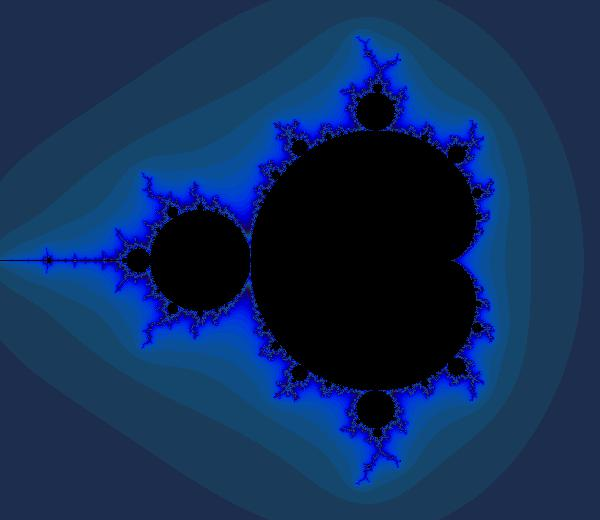

In [16]:


def DisplayFractal(a, fmt='jpeg'):
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
              30+50*np.sin(a_cyclic),
              155-80*np.cos(a_cyclic)],2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  f = BytesIO()
  PIL.Image.fromarray(a).save(f,fmt)
  display(Image(data=f.getvalue()))

Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005] # shape:(2, 520, 600)
"""
Y, X: 3-D matrix

[[
-1.300,-1.300,-1.300....-1.300  # rows are the same
-1.295,-1.295,-1.295....-1.295
....
 1.295,1.295,1.295,....1.295,
]
[
-2.000,-1.995,-1.990....0.995  # cols are the same
-2.000,-1.995,-1.990....0.995
....
-2.000,-1.995,-1.990....0.995
]]
"""
Z = X + 1j*Y # shape:(2, 520, 600) for z in Z = -1.3-1.3j, .....1.295+1.295j...0.995+0.995j...

xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs, tf.float32))

for i in range(400):
  zs_ = zs*zs+xs
  not_deverged = tf.abs(zs_)<4
  zs.assign(zs_)
  ns.assign_add(tf.cast(not_deverged, tf.float32))

DisplayFractal(ns.numpy())

In [15]:
np.mgrid[-1.3:1.3:0.005, -2:1:0.005].shape

(2, 520, 600)